In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
import sqlite3
import mysql.connector as cnt
# import plotly.express as px

In [2]:
SDB = sqlite3.connect('VarlePigu.db')
Cs = SDB.cursor()

sql="""SELECT *
FROM "SaldytuvaiVarle";
"""
df = pd.read_sql_query(sql, con=SDB)

SDB.close()
cols = df.columns
for c in cols:
    print(c)

nuoroda
firstInfo
kaina
buvusiKaina
gamintojas
tipas
montavimo tipas
energijos klasė
talpa (l)
aukštis (cm)
modelio pavadinimas
spalva
bešerkšnė sistema
energijos vartojimo efektyvumo klasė (reglamentas (es) 2017/1369)
automatinis atitirpinimas
ore skleidžiamas akustinis triukšmas
big box
prijungti prietaisai su home connect
ore skleidžiamo akustinio triukšmo klasė
durelių vyris
durelių panelio pakeitimo galimybė
vyrių tipas
valdymo nustatymo ir signalizavimo įtaisų tipas
vidutinės metinės energijos sąnaudos kilovatvalandėmis per metus (kwh/m.)
atšaldymo kamerų tūrių suma
šaldymo temperatūros kamerų tūrių suma
klimato klasė
integruoti priedai
gaminio išmatavimai
minimalus montavimo nišos aukštis
maksimalus montavimo nišos aukštis
mažiausias montavimo angos plotis
didžiausias montavimo angos plotis
montavimo gylis
svoris neto
supercooling
superfreezing
low frost
vario zone
easyaccess lentynos
ecomode
pagrindinis jutiklinis valdymas
vario lentyna
itin tylūs prietaisai
lentynėlių skaičius

In [3]:
SDB = sqlite3.connect('VarlePigu.db')
Cs = SDB.cursor()

sql="""SELECT kaina,`šaldytuvų tipai`, tipas, `gaminio tipas`, `garsumo klasė`, `šaldiklio tipas`, 
`durų tipas`, `durų kiekis`, `šaldymo technologijos tipas`, `šaldytuvo tipas`
FROM "SaldytuvaiVarle";
"""
df = pd.read_sql_query(sql, con=SDB)
SDB.close()

In [4]:
lst = df['tipas'].tolist()
print(set(lst))

{'Su kamera viršuje', 'Šaldytuvai su šaldikliu viršuje', 'Mini\n\nSu kamera viduje', 'Lentynėlė', 'Šaldikliai', 'Laisvai pastatomas', 'Larder', 'Showcase', 'Su kamera', None, 'Mini\n\nBe kameros', 'Su kamera viduje', 'Mini', 'Stačiai', 'Fridge with freezer inside', 'Šaldytuvai su šaldikliu apačioje', 'Šaldytuvas su apatiniu šaldikliu', 'Pastatas', 'Be kameros', 'Vitrina', 'Šaldytuvas', 'Su kamera apačioje', 'Fridge without freezer', 'Combi', 'Šaldytuvas-Šaldytuvas', 'Saugykla', 'Side by side', 'Šaldytuvai su šaldymo kamera', 'Double door', 'Vienaduriai', 'Fridge with top freezer', 'Dviduriai'}


In [5]:
SDB = sqlite3.connect('VarlePigu.db')
Cs = SDB.cursor()

# sql="""SELECT kaina, `montavimo tipas`, `durų tipas`, `durų montavimas`, `šaldytuvų tipai`
# FROM "SaldytuvaiVarle";
# """

sql="""SELECT kaina, `montavimo tipas`
FROM "SaldytuvaiVarle";
"""
df = pd.read_sql_query(sql, con=SDB)

SDB.close()


In [6]:
df.columns

Index(['kaina', 'montavimo tipas'], dtype='object')

In [7]:
df.dropna(subset='montavimo tipas', inplace=True)
df.head()

,kaina,montavimo tipas
0,222,Laisvai statomi
1,170,Laisvai statomi
2,575.99,Įmontuojami
3,455,Laisvai statomi
4,450,Įmontuojami


In [8]:
tipai = set(df['montavimo tipas'].tolist())
print(tipai)

{'N/a', 'Pilnai įmontuojama', 'Laisvai pastatoma', 'Laisvai pastatomos', 'Integruota', 'laisvai pastatoma', 'Laisvai statoma', 'įmontuojama', 'Pastatytas', 'Įmontuojami', 'Montuojami', 'Laisvai statomi'}


In [9]:
def set_saldytuvo_tipas(x):
    if 'stat' in x:
        return 'Laivai pastatomi'
    elif 'montuo' in x:
        return 'Įmontuojami'
    elif 'ntegruo' in x:
        return 'Integruojami'
    else:
        return 'Kita'
    
df['mtipas'] =df['montavimo tipas'].apply(set_saldytuvo_tipas)
df['kaina'] = df['kaina'].apply(lambda x: float(x))
df.head()

,kaina,montavimo tipas,mtipas
0,222.00,Laisvai statomi,Laivai pastatomi
1,170.00,Laisvai statomi,Laivai pastatomi
2,575.99,Įmontuojami,Įmontuojami
3,455.00,Laisvai statomi,Laivai pastatomi
4,450.00,Įmontuojami,Įmontuojami


In [10]:

df1 = df[['kaina', 'mtipas']].groupby('mtipas').mean(numeric_only=True).reset_index()
# df1_gr = df1.groupby('mtipas').mean(numeric_only=True).reset_index()
df1

,mtipas,kaina
0,Integruojami,881.545333
1,Kita,686.454286
2,Laivai pastatomi,567.290346
3,Įmontuojami,958.291438


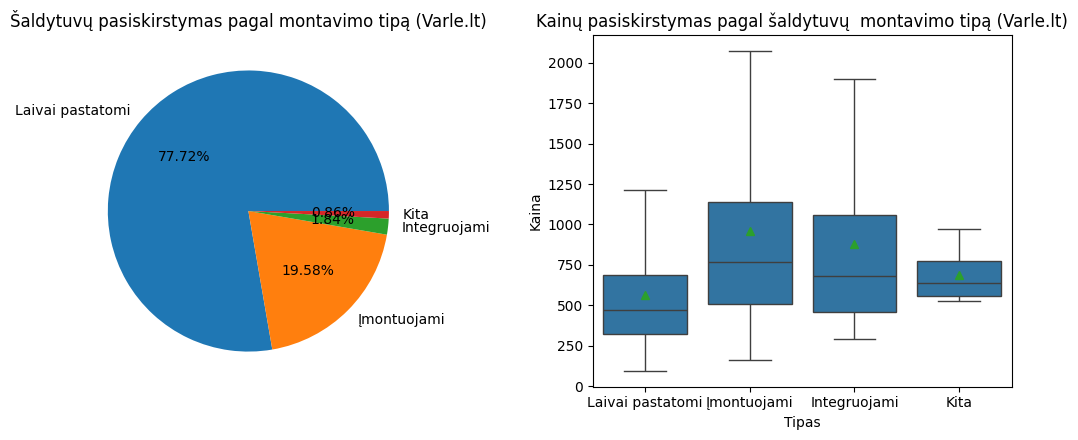

In [11]:
c =df['mtipas'].value_counts()
fig, (axis1, axis2) = plt.subplots(1,2, figsize=(10.5, 4.5))
axis1.pie(c.values, labels=c.index, autopct='%.2f%%')
sns.boxplot(data=df, x='mtipas', y='kaina', showmeans=True, showfliers=False, ax=axis2)
axis1.set_title('Šaldytuvų pasiskirstymas pagal montavimo tipą (Varle.lt)')
axis2.set_title('Kainų pasiskirstymas pagal šaldytuvų  montavimo tipą (Varle.lt)')
axis2.set_xlabel('Tipas')
axis2.set_ylabel('Kaina')
fig.tight_layout()
plt.show()

In [12]:
SDB = sqlite3.connect('VarlePigu.db')
Cs = SDB.cursor()

sql="""SELECT `Šaldytuvo tipas:`
FROM "SaldytuvaiPigu";
"""
df = pd.read_sql_query(sql, con=SDB)
SDB.close()
lst = df['Šaldytuvo tipas:'].tolist()
print(set(lst))

{None, 'Šaldytuvas su šaldikliu apačioje', 'Šaldytuvas su šaldikliu viršuje', 'Šaldytuvas be šaldiklio', 'Vitrininis šaldytuvas', 'Dviduris šaldytuvas', 'Mini šaldytuvas', 'Įmontuojamas šaldytuvas'}


In [13]:
SDB = sqlite3.connect('VarlePigu.db')
Cs = SDB.cursor()

sql="""SELECT kaina, tipas
FROM "SaldytuvaiVarle";
"""
df = pd.read_sql_query(sql, con=SDB)
SDB.close()

In [20]:
df.dropna(subset='tipas', inplace=True)

def set_saldytuvo_tipas(x):
    # if 'labas' in x:
    #     return 'nar'
    if 'apa' in x:
        return 'Šaldytuvas su šaldikliu apačioje'
    elif 'virš' in x or 'with top' in x:
        return 'Šaldytuvas su šaldikliu viršuje'
    elif 'Mini' in x:
        return 'Mini'
    elif 'without' in x or 'Be k' in x:
        return 'Šaldytuvas be šaldiklio'
    elif 'kamera' in x or 'inside' in x:
        return 'Šaldytuvas su šaldikliu viduje'
    elif 'Dvid'in x or 'Double' in x:
        return 'Dviduriai šaldytuvai'
    elif 'stat' in x:
        return 'Laisvai pastatomas'
    else:
        return x
    
df['stipas'] =df['tipas'].apply(set_saldytuvo_tipas)

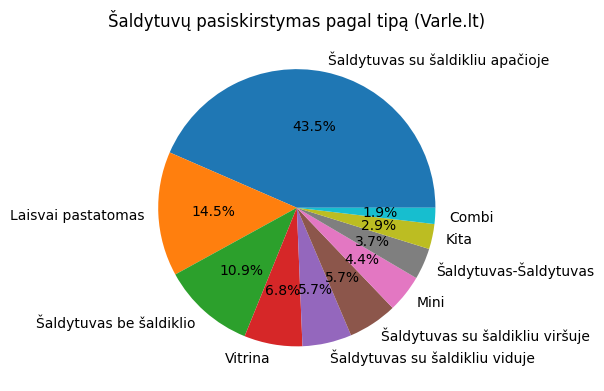

In [28]:
top = df['stipas'].value_counts().head(10).index.tolist()
df['stipas'] = df['stipas'].apply(lambda x: x if x in top else 'Kita')
c = df['stipas'].value_counts()

fig, ax = plt.subplots(figsize=(8, 4.5))
ax.pie(c.values, labels=c.index, autopct='%.1f%%')
plt.title('Šaldytuvų pasiskirstymas pagal tipą (Varle.lt)')
plt.show()

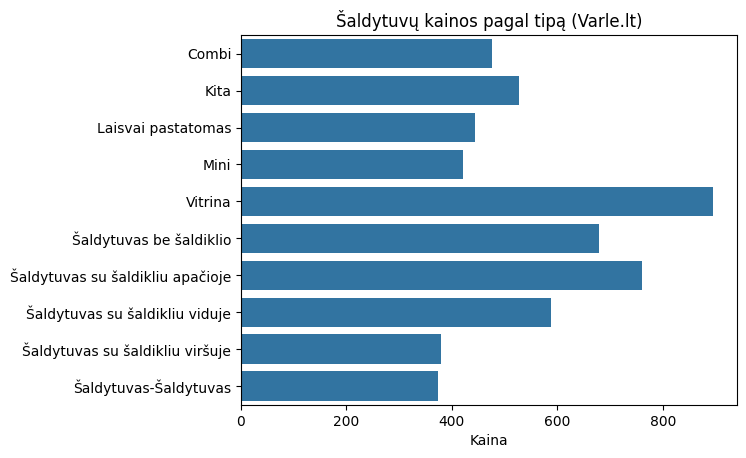

In [42]:
df['kaina'] = df['kaina'].apply(lambda x: float(x))
kaina_gr =df[['kaina', 'stipas']].groupby('stipas').mean(numeric_only=True).round()

sns.barplot(data=kaina_gr, y='stipas', x='kaina', orient='h')
plt.xlabel('Kaina')
plt.ylabel('')
plt.title('Šaldytuvų kainos pagal tipą (Varle.lt)')
plt.show()


In [85]:
SDB = sqlite3.connect('VarlePigu.db')
Cs = SDB.cursor()

sql="""SELECT kaina, `talpa (l)`, `naudinga šaldytuvo talpa`, `šaldytuvo talpa [l]`,
`bendra talpa neto`, `šaldytuvo talpa neto`, `šaldytuvo talpa`, `bendros grynosios talpos`, `bendra talpa`, `šaldymo talpa`,
`šaldytuvo neto talpa`, `bendra neto talpa`, `bendroji talpa neto`, `šaldytuvo talpa (neto)`,
`talpa (neto)`, `šaldytuvo talpa (l)`, `grynoji talpa`, `bendroji talpa neto (l)`, `šaldytuvo talpa neto (l)`
FROM "SaldytuvaiVarle";
"""
df = pd.read_sql_query(sql, con=SDB)
SDB.close()

In [87]:
for col in df.columns:
    if col != 'kaina':
        df['V'] = df['talpa (l)'].fillna(df[col])
    
df['kaina'] = df['kaina'].apply(lambda x: float(x))

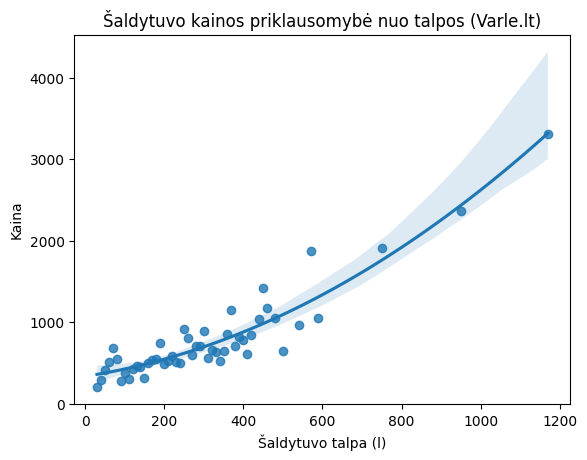

In [88]:
df.dropna(subset='V', inplace=True)
dfv = df[['kaina', 'V']]
dfv['V'] = df['V'].apply(lambda x: float(x))
dfv['Vgr'] = dfv['V'].apply(lambda x: int(np.ceil(x/10) * 10))

dfv_gr = dfv.groupby('Vgr').mean(numeric_only=True).round().reset_index()
dfv_gr.head()
sns.regplot(data=dfv_gr[dfv_gr['Vgr'] > 10], x='Vgr', y='kaina', order=2)
plt.title('Šaldytuvo kainos priklausomybė nuo talpos (Varle.lt)')
plt.ylabel('Kaina')
plt.xlabel('Šaldytuvo talpa (l)')
plt.show()

In [96]:
# energijos klase

SDB = sqlite3.connect('VarlePigu.db')
Cs = SDB.cursor()

sql="""SELECT kaina, 
`energijos klasė`, 
`energijos vartojimo efektyvumo klasė (reglamentas (es) 2017/1369)`,
`energijos efektyvumo klasė`
FROM "SaldytuvaiVarle";
"""
df = pd.read_sql_query(sql, con=SDB)
SDB.close()
df.head()

,kaina,energijos klasė,energijos vartojimo efektyvumo klasė (reglamentas (es) 2017/1369),energijos efektyvumo klasė
0,222,E,None,None
1,170,E,None,None
2,575.99,E,E,None
3,455,E,E,None
4,450,F,None,None


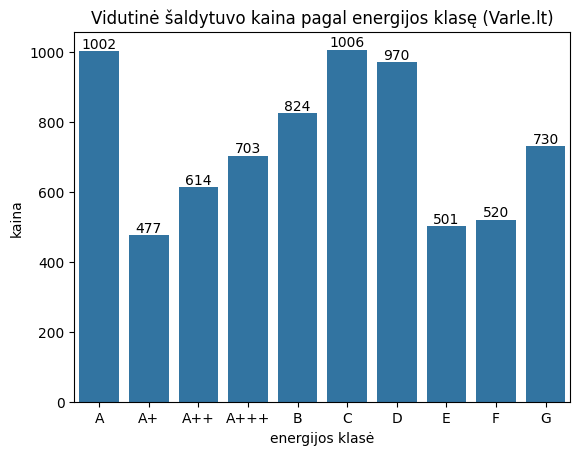

In [99]:
for col in df.columns:
    if col != 'kaina':
        df['energijos klasė'] = df['energijos klasė'].fillna(df[col])
    
df['energijos klasė'] = df['energijos klasė'].apply(lambda x: x.upper() if x is not None else x)
df['kaina'] = df['kaina'].apply(lambda x: float(x))

dfe = df[['kaina', 'energijos klasė']]
dfe_gr = dfe.groupby('energijos klasė').mean(numeric_only=True).round().reset_index()
fig, ax = plt.subplots()
sns.barplot(data=dfe_gr, x='energijos klasė', y='kaina')
for container in ax.containers:
    ax.bar_label(container)
plt.title('Vidutinė šaldytuvo kaina pagal energijos klasę (Varle.lt)')
plt.show()

In [128]:
# Energijos sanaudos

SDB = sqlite3.connect('VarlePigu.db')
Cs = SDB.cursor()

sql="""SELECT kaina, 
`vidutinės metinės energijos sąnaudos kilovatvalandėmis per metus (kwh/m.)`,
`metinės energijos sąnaudos`,
`metinis energijos suvartojimas (kwh)`,
`energijos suvartojimas per metus`,
`energijos sąnaudos`,
`metinis energijos suvartojimas`,
`suvartojama energija`,
`bendras suvartojamos energijos kiekis per metus`,
`energijos sąnaudos (kwh/metus)`,
`suvartojama energija (kwh)`,
`bendras suvartojamos energijos kiekis per metus (kwh)`,
`energijos sąnaudos per metus`
FROM "SaldytuvaiVarle";
"""
df = pd.read_sql_query(sql, con=SDB)
SDB.close()
df.head()

,kaina,vidutinės metinės energijos sąnaudos kilovatvalandėmis per metus (kwh/m.),metinės energijos sąnaudos,metinis energijos suvartojimas (kwh),energijos suvartojimas per metus,energijos sąnaudos,metinis energijos suvartojimas,suvartojama energija,bendras suvartojamos energijos kiekis per metus,energijos sąnaudos (kwh/metus),suvartojama energija (kwh),bendras suvartojamos energijos kiekis per metus (kwh),energijos sąnaudos per metus
0,222,None,None,None,None,None,None,None,None,None,None,None,None
1,170,None,None,None,None,None,None,None,None,None,None,None,None
2,575.99,234 kwh/annum,None,None,None,None,None,None,None,None,None,None,None
3,455,239 kwh/annum,None,None,None,None,None,None,None,None,None,None,None
4,450,None,None,None,None,None,None,None,None,None,None,None,None


In [129]:
for col in df.columns:
    if col != 'kaina':
        df['energija'] = df['metinės energijos sąnaudos'].fillna(df[col])

df['kaina'] = df['kaina'].apply(lambda x: float(x))
dfe = df[['kaina', 'energija']]
dfe.dropna(subset='energija', inplace=True)
dfe.head()

,kaina,energija
5,870.00,181
13,899.00,114
23,748.99,235
30,1579.99,164
44,685.68,215


In [130]:
dfe['energija'] = dfe['energija'].apply(lambda x: x.replace('kWh/metus', '').replace('kWh', '').replace(',', '.'))
dfe['energija'] = dfe['energija'].apply(lambda x: float(x))

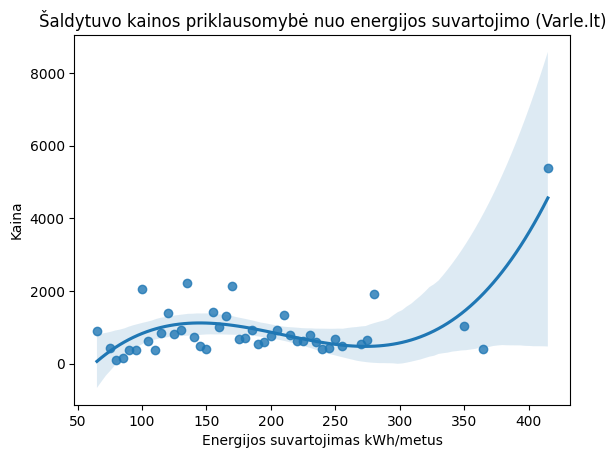

In [137]:

dfe['E'] = dfe['energija'].apply(lambda x: int(np.ceil(x/5) * 5))

dfe_gr = dfe.groupby('E').mean(numeric_only=True).round().reset_index()

sns.regplot(data=dfe_gr[dfe_gr['E'] < 500], x='E', y='kaina', order=3)
plt.title('Šaldytuvo kainos priklausomybė nuo energijos suvartojimo (Varle.lt)')
plt.ylabel('Kaina')
plt.xlabel('Energijos suvartojimas kWh/metus')
plt.show()

In [138]:
# garsas/triuksmas
SDB = sqlite3.connect('VarlePigu.db')
Cs = SDB.cursor()

sql="""SELECT kaina, 
`ore skleidžiamas akustinis triukšmas`,
`ore skleidžiamo akustinio triukšmo klasė`,
`triukšmo lygis [db]`,
`maksimalus triukšmo lygis`,
`triukšmo lygis (db)`,
`triukšmo klasė`,
`triukšmo lygis`,
`ore sklindančio akustinio triukšmo įvertinimas`,
`triukšmo galia`,
`triukšmo lygis, db`,
`triukšmingumo lygis`,
`triukšmo lygis (db (a) re 1 pw)`,
`ore sklindančio triukšmo klasė`,
`garso lygio klasė`,
`garsumo klasė`,
`garso lygis`
FROM "SaldytuvaiVarle";
"""
df = pd.read_sql_query(sql, con=SDB)
SDB.close()
df.head()


,kaina,ore skleidžiamas akustinis triukšmas,ore skleidžiamo akustinio triukšmo klasė,triukšmo lygis [db],maksimalus triukšmo lygis,triukšmo lygis (db),triukšmo klasė,triukšmo lygis,ore sklindančio akustinio triukšmo įvertinimas,triukšmo galia,"triukšmo lygis, db",triukšmingumo lygis,triukšmo lygis (db (a) re 1 pw),ore sklindančio triukšmo klasė,garso lygio klasė,garsumo klasė,garso lygis
0,222,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
1,170,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
2,575.99,35 db(a) re 1pw,B,None,None,None,None,None,None,None,None,None,None,None,None,None,None
3,455,42 db(a) re 1pw,D,None,None,None,None,None,None,None,None,None,None,None,None,None,None
4,450,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
